In [1]:
'''
This notebook does exploratory data analysis to extract insights from our scraped reddit dataset. 
Framewordks: Pandas
Concepts: Pearsons Correlation Constant (cell 9)
System: Macbook Air M2
Notebook written by - Sanskar Sehgal
'''


'\nThis notebook does exploratory data analysis to extract insights from our scraped reddit dataset. \nFramewordks: Pandas\nConcepts: Pearsons Correlation Constant (cell 9)\nSystem: Macbook Air M2\nNotebook written by - Sanskar Sehgal\n'

In [2]:
import pandas as pd
import pickle
import praw
import datetime as dt
import glob
import math
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns


## Organize Data to visualize

In [3]:
# Initialize the outer dictionary
frequency_dict = {}

# Loop through the years
for year in range(2018, 2024):

    # Initialize the inner dictionary for the current year
    inner_dict = {}

    # Loop through the months
    for month in range(1, 13):

        # Add the current month to the inner dictionary
        inner_dict[month] = {'critical': 0, 'major' :0, 
                             'moderate' :0,'minor' :0, 'cosmetic' :0
                            }

    # Add the inner dictionary to the outer dictionary
    frequency_dict[year] = inner_dict

directory_path = '/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse'
for file in glob.glob(directory_path + '/*'):
    if file[-3:] == 'csv' and file[-8:-4]!= 'data' and file.split('/')[-1] != 'covid_data_active_cases_monthly.csv':
        print(file)
        df = pd.read_csv(file)

        max_column = df[["critical", "major", "moderate", "minor", "cosmetic"]].idxmax(axis=1)


        for i,j in enumerate(max_column):
            date = df.loc[i, 'Created On'].split('-')
            year = int(date[0])
            month = int(date[1])

            frequency_dict[year][month][j] += 1



/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/leaves.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/stopdrinking.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/dryalcoholics.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/cocaine.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/Sober.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/alcoholism.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/addiction.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/addictionrecovery.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/NarcoticsAnonymous.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/addictedtotheneedle.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse/StopSpeeding.csv
/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Subst

## Data Visualization

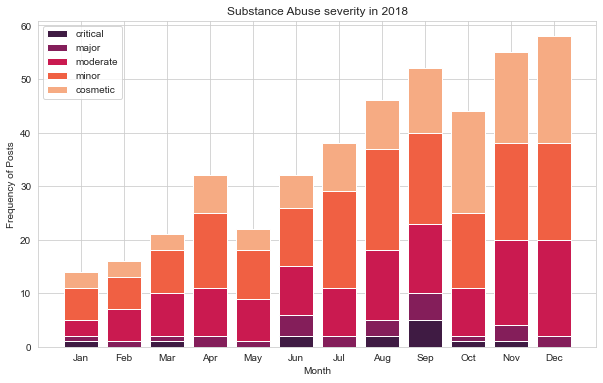

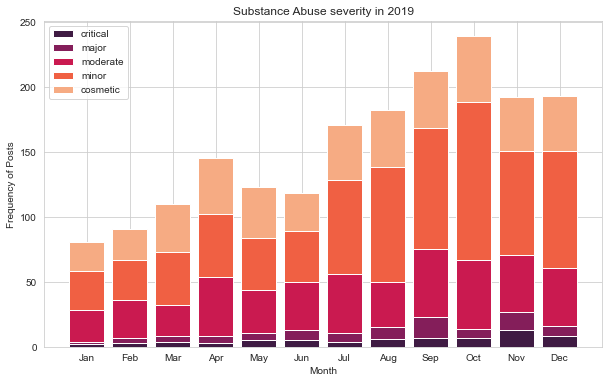

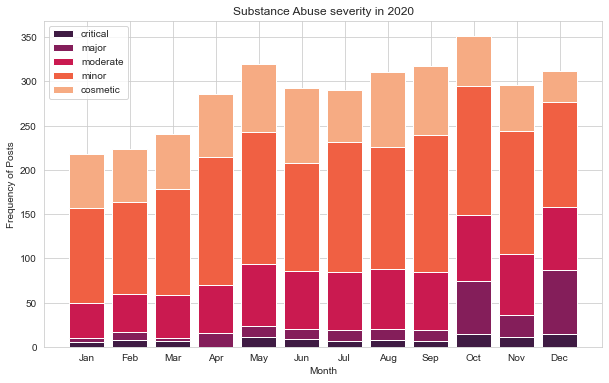

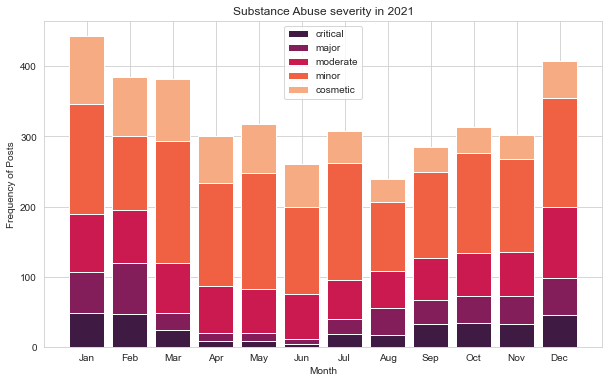

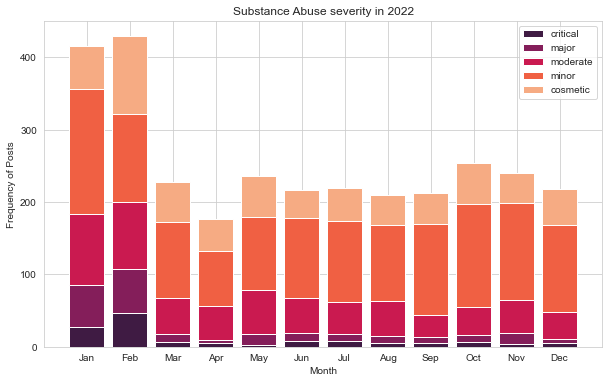

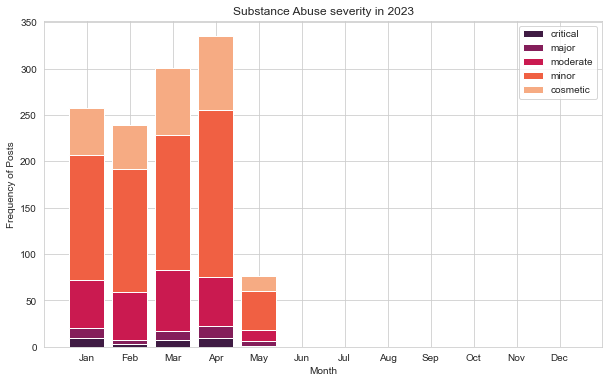

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
Bar plots Plots showing frequency of critical, major, moderate, minor, cosmetic posts 
in selected subreddits related to substance abuse in different months and years. 

Data Format: 

data = {
    2018: {
        Jan: {'critical': 1, 'major': 0, 'moderate': 0, 'minor': 0, 'cosmetic': 0},
        # ...
    },
    2019: {
        Jan: {'critical': 0, 'major': 0, 'moderate': 2, 'minor': 0, 'cosmetic': 1},
        # ...
    },
    2020: {
        Jan: {'critical': 5, 'major': 0, 'moderate': 4, 'minor': 0, 'cosmetic': 6},
        # ...
    }
}
'''
def plot_barchart(year_data):
    # Extract the data for each category
    critical = [year_data[i]['critical'] for i in range(1, 13)]
    major = [year_data[i]['major'] for i in range(1, 13)]
    moderate = [year_data[i]['moderate'] for i in range(1, 13)]
    minor = [year_data[i]['minor'] for i in range(1, 13)]
    cosmetic = [year_data[i]['cosmetic'] for i in range(1, 13)]

    # Create a bar chart
    x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    color_palette = sns.color_palette("rocket_r", 5)
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    plt.bar(x, critical, color=color_palette[4], label='critical')
    plt.bar(x, major, bottom=critical, color=color_palette[3], label='major')
    plt.bar(x, moderate, bottom=[sum(i) for i in zip(critical, major)], color=color_palette[2], label='moderate')
    plt.bar(x, minor, bottom=[sum(i) for i in zip(critical, major, moderate)], color=color_palette[1], label='minor')
    plt.bar(x, cosmetic, bottom=[sum(i) for i in zip(critical, major, moderate, minor)], color=color_palette[0], label='cosmetic')
    plt.xlabel('Month')
    plt.ylabel('Frequency of Posts')
    plt.title(f"Substance Abuse severity in {year}")
    plt.legend()
    plt.show()

with open('data_freq_dict_final.pkl', 'rb') as f:
    frequency_dict = pickle.load(f)
    
for year, year_data in frequency_dict.items():
    plot_barchart(year_data)


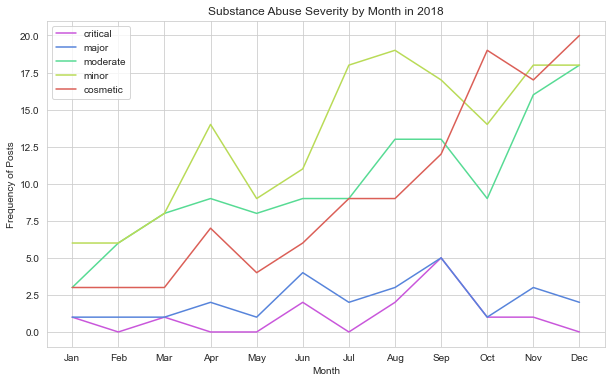

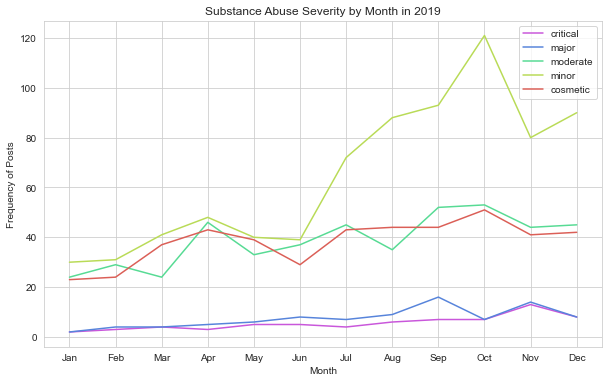

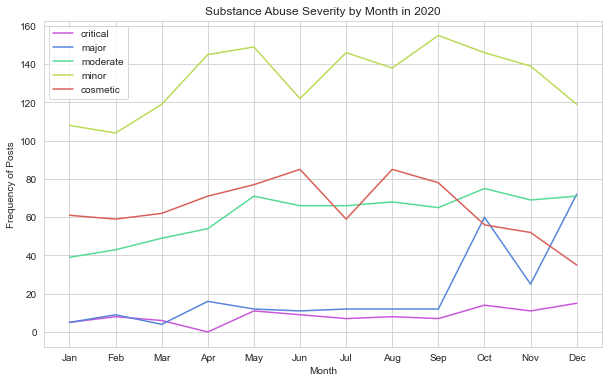

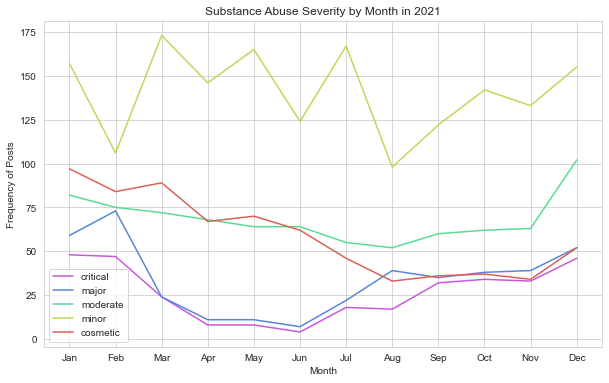

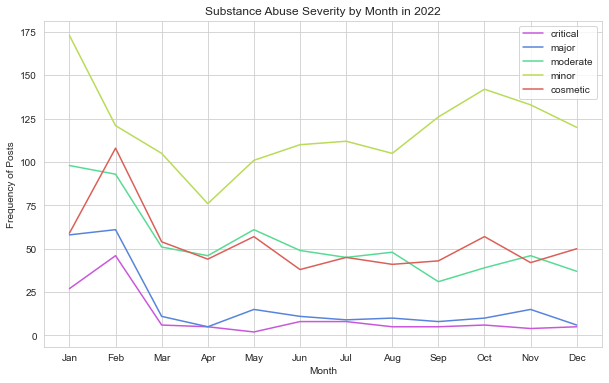

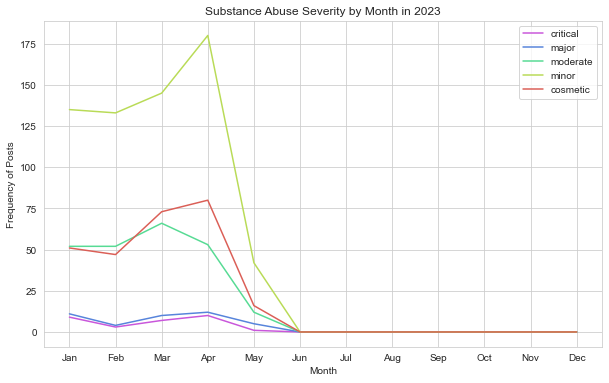

In [5]:
'''
Line Plots showing frequency of critical, major, moderate, minor, cosmetic posts 
in selected subreddits related to substance abuse in different months and years. 
'''
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(data):
    # Extract the data for each category
    critical = [data[i]['critical'] for i in range(1, 13)]
    major = [data[i]['major'] for i in range(1, 13)]
    moderate = [data[i]['moderate'] for i in range(1, 13)]
    minor = [data[i]['minor'] for i in range(1, 13)]
    cosmetic = [data[i]['cosmetic'] for i in range(1, 13)]

    # Create a scatter plot
    x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    color_palette = sns.color_palette("hls", 5)
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(x, critical, color=color_palette[4], label='critical')
    plt.plot(x, major, color=color_palette[3], label='major')
    plt.plot(x, moderate, color=color_palette[2], label='moderate')
    plt.plot(x, minor, color=color_palette[1], label='minor')
    plt.plot(x, cosmetic, color=color_palette[0], label='cosmetic')
    plt.xlabel('Month')
    plt.ylabel('Frequency of Posts')
    plt.title('Substance Abuse Severity by Month in {}'.format(year))
   

    plt.legend()
    plt.show()

for year, year_data in frequency_dict.items():
    plot_scatter(year_data)


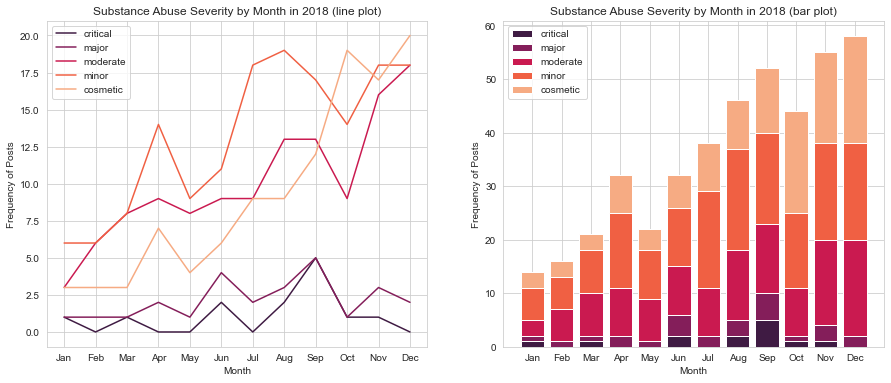

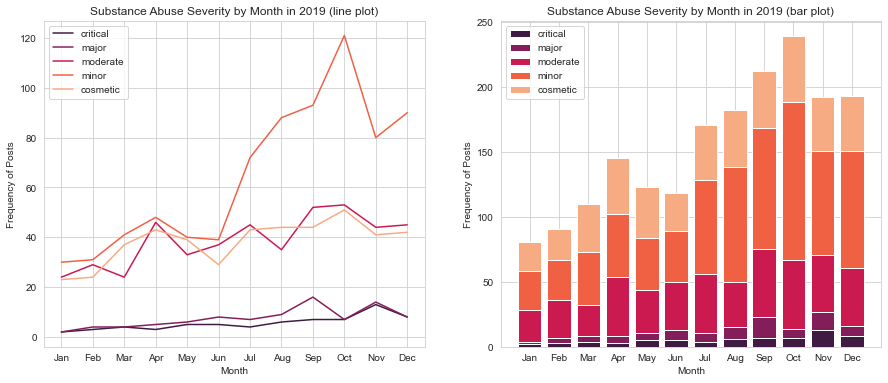

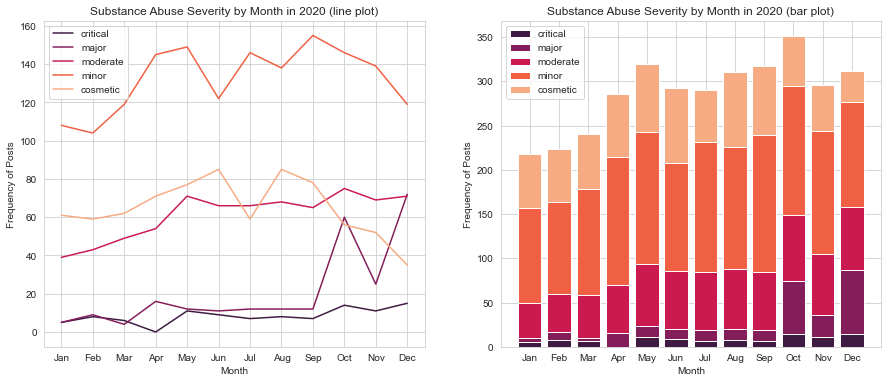

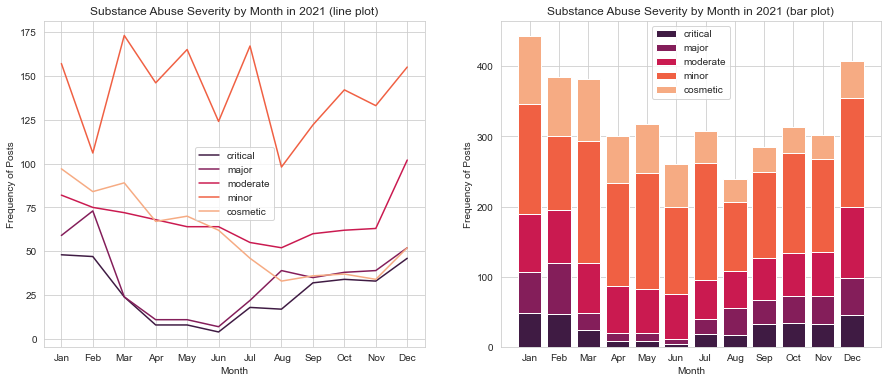

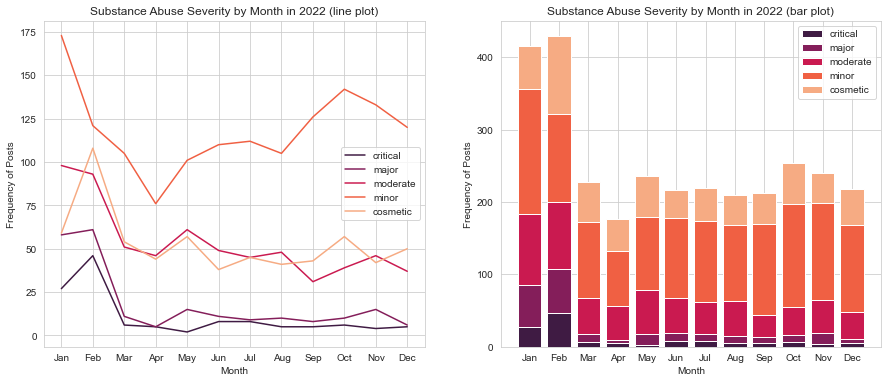

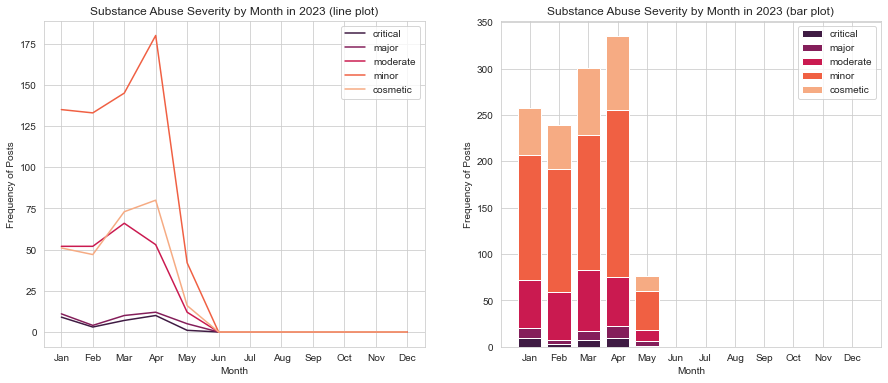

In [6]:
'''
The bar and line plots side by side for easier understanding
'''


def plot_line_and_bar(year_data):
    # Extract the data for each category
    critical = [year_data[i]['critical'] for i in range(1, 13)]
    major = [year_data[i]['major'] for i in range(1, 13)]
    moderate = [year_data[i]['moderate'] for i in range(1, 13)]
    minor = [year_data[i]['minor'] for i in range(1, 13)]
    cosmetic = [year_data[i]['cosmetic'] for i in range(1, 13)]

    # Create a line plot
    x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    color_palette = sns.color_palette("rocket_r", 5)
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))

    ax1.plot(x, critical, color=color_palette[4], label='critical')
    ax1.plot(x, major, color=color_palette[3], label='major')
    ax1.plot(x, moderate, color=color_palette[2], label='moderate')
    ax1.plot(x, minor, color=color_palette[1], label='minor')
    ax1.plot(x, cosmetic, color=color_palette[0], label='cosmetic')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Frequency of Posts')
    ax1.set_title('Substance Abuse Severity by Month in {} (line plot)'.format(year))
    ax1.legend()

    # Create a bar chart
    color_palette = sns.color_palette("rocket_r", 5)
    ax2.bar(x, critical, color=color_palette[4], label='critical')
    ax2.bar(x, major, bottom=critical, color=color_palette[3], label='major')
    ax2.bar(x, moderate, bottom=[sum(i) for i in zip(critical, major)], color=color_palette[2], label='moderate')
    ax2.bar(x, minor, bottom=[sum(i) for i in zip(critical, major, moderate)], color=color_palette[1], label='minor')
    ax2.bar(x, cosmetic, bottom=[sum(i) for i in zip(critical, major, moderate, minor)], color=color_palette[0], label='cosmetic')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Frequency of Posts')
    ax2.set_title('Substance Abuse Severity by Month in {} (bar plot)'.format(year))
    ax2.legend()

    plt.show()

for year, year_data in frequency_dict.items():
    plot_line_and_bar(year_data)


## Incorporating Covid Data into Above plots and plotting a Correlation

In [7]:
monthly_cases = pd.read_csv('covid_data_active_cases_monthly.csv', index_col=[0])

In [8]:
monthly_cases.index = pd.to_datetime(monthly_cases.index)

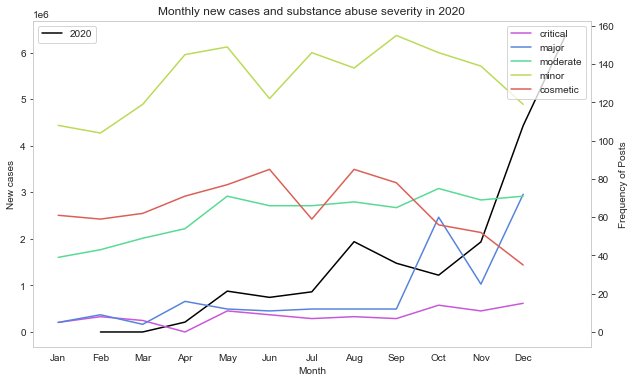

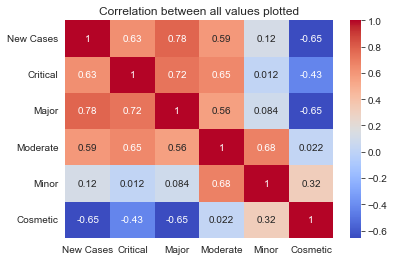

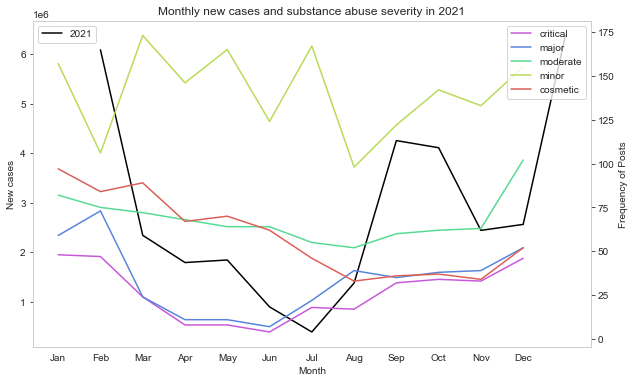

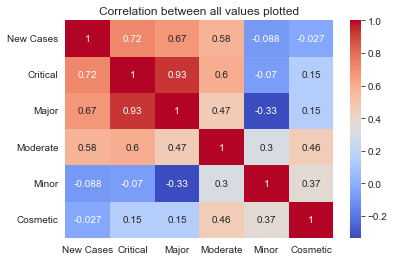

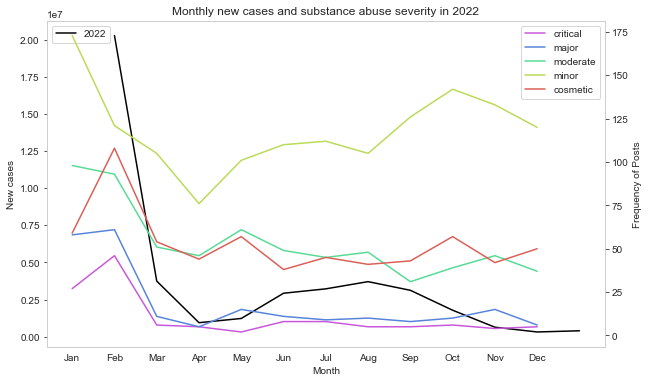

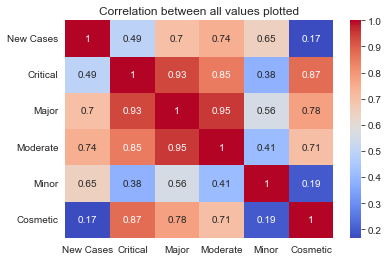

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas dataframe
df_cases = monthly_cases

# Group the cases data by year
by_year = df_cases.groupby(df_cases.index.year)


for year, data in by_year:
    # Create a figure and axis object

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the line plot on the first axis

    ax1.plot(data.index.month, data['new_case'], label=year, color = 'black')

    # Set the axis labels and title for the first axis
    ax1.set_xlabel('Month')
    ax1.set_ylabel('New cases')
    ax1.set_title('Monthly new cases and substance abuse severity in {}'.format(year))

    # Add a legend to the first axis
    ax1.legend(loc = 'upper left')
    ax1.grid(linewidth=0)

    # Create a second axis sharing the x-axis with the first
    ax2 = ax1.twinx()
    df_substance = pd.DataFrame(frequency_dict[year])

    # Extract the data for each category and plot on the second axis
    critical = [df_substance[i]['critical'] for i in range(1, 13)]
    major = [df_substance[i]['major'] for i in range(1, 13)]
    moderate = [df_substance[i]['moderate'] for i in range(1, 13)]
    minor = [df_substance[i]['minor'] for i in range(1, 13)]
    cosmetic = [df_substance[i]['cosmetic'] for i in range(1, 13)]

    x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    color_palette = sns.color_palette("hls", 5)
    ax2.plot(x, critical, color=color_palette[4], label='critical')
    ax2.plot(x, major, color=color_palette[3], label='major')
    ax2.plot(x, moderate, color=color_palette[2], label='moderate')
    ax2.plot(x, minor, color=color_palette[1], label='minor')
    ax2.plot(x, cosmetic, color=color_palette[0], label='cosmetic')
    ax2.grid(linewidth=0)

    # Set the axis labels and title for the second axis
    ax2.set_ylabel('Frequency of Posts')

    # Add a legend to the second axis
    ax2.legend(loc = 'upper right')

    # Show the plot
    plt.show()
    
    df = pd.DataFrame({'New Cases': data['new_case'], 'Critical': critical, 'Major': major,
                   'Moderate': moderate, 'Minor': minor, 'Cosmetic': cosmetic})
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation between all values plotted')
    plt.show()


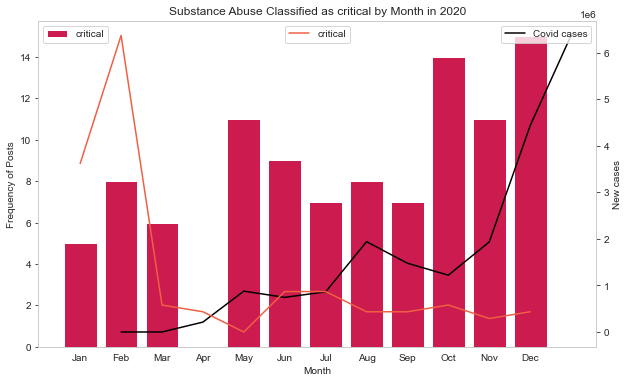

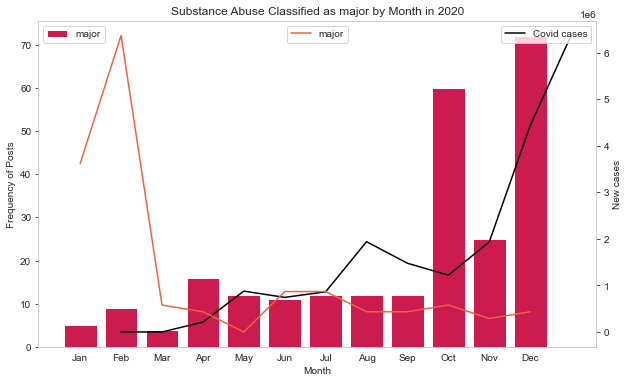

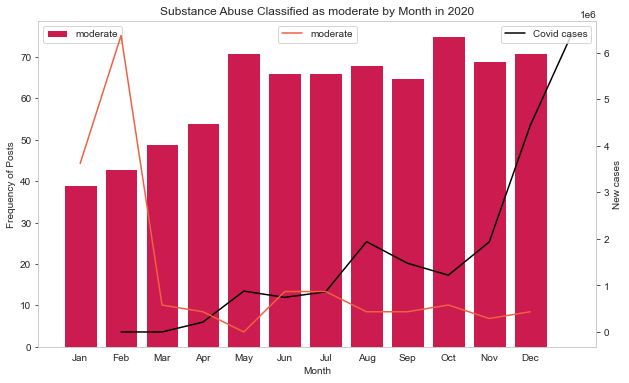

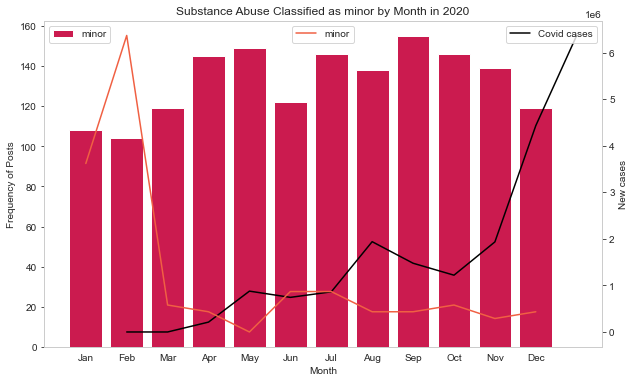

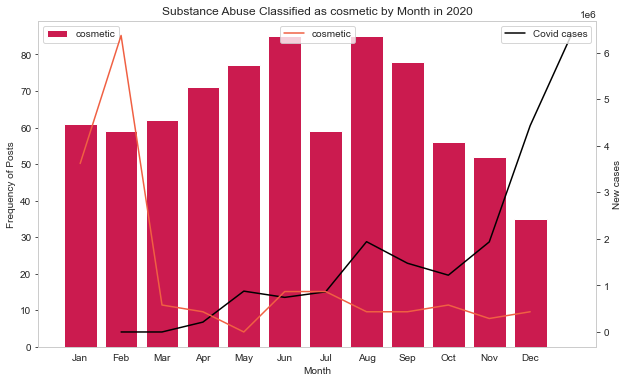

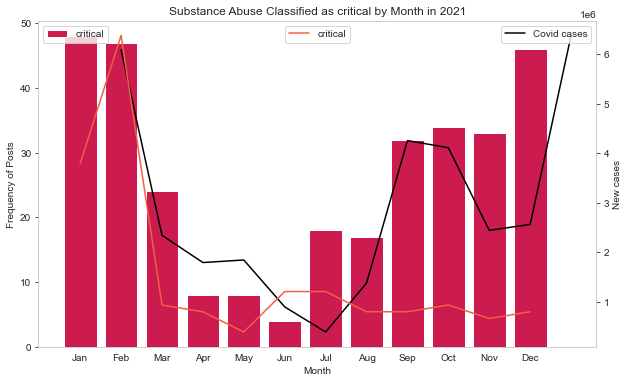

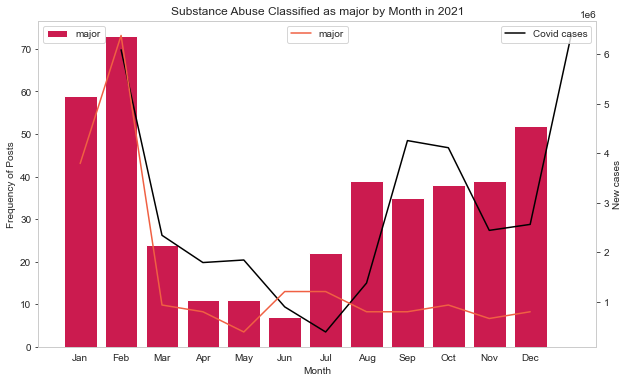

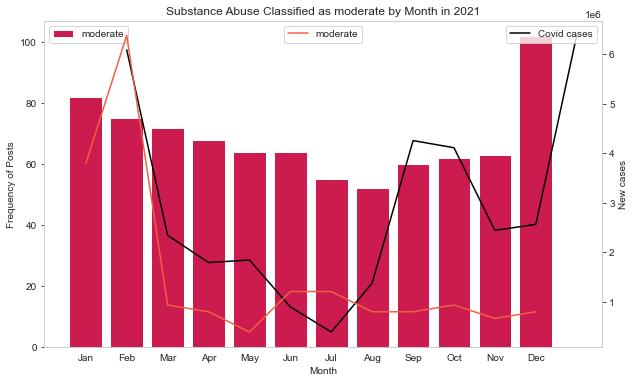

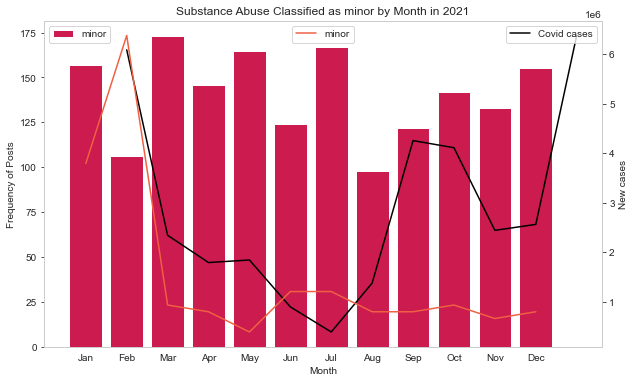

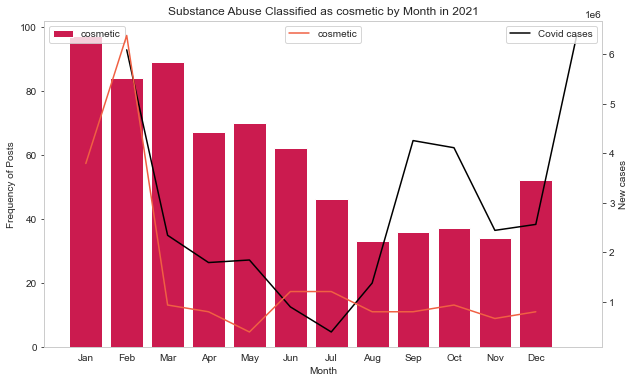

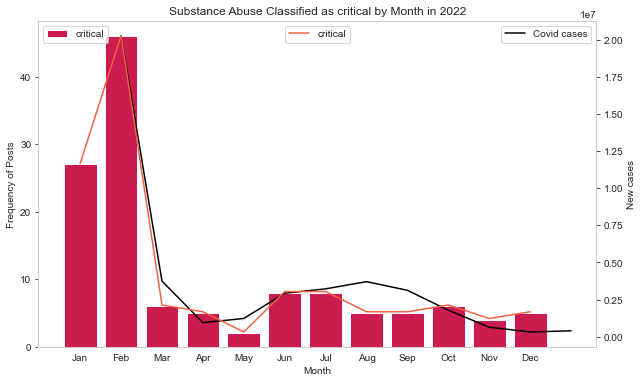

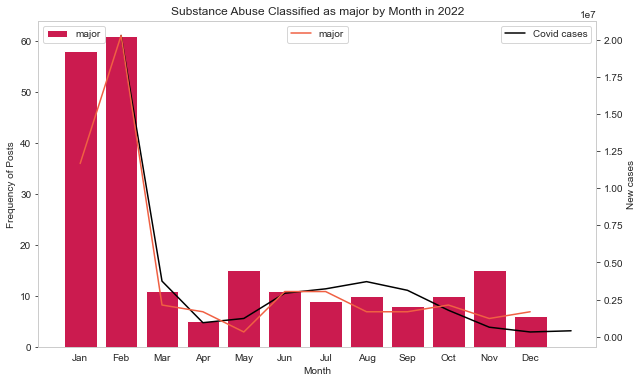

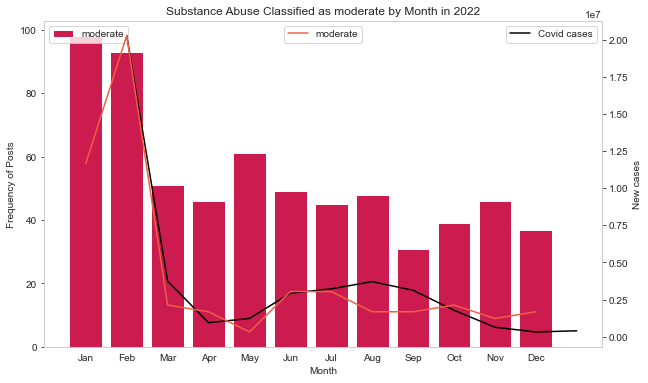

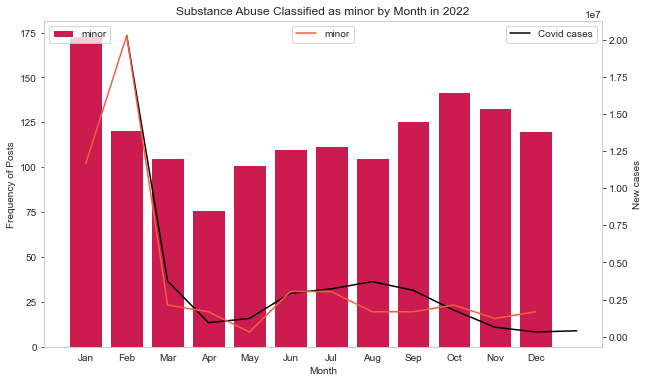

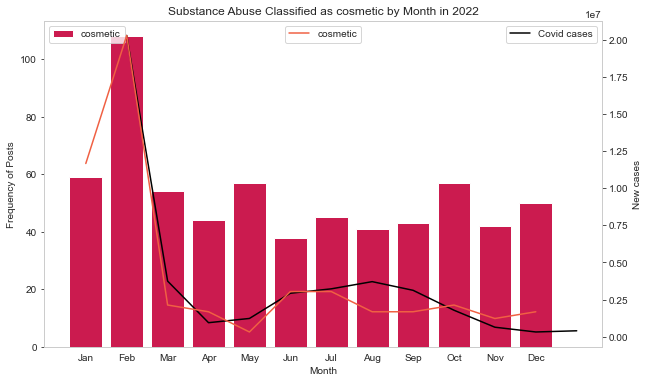

In [10]:
def plot_bar_line(data_covid, data, year):
    severity = {}
    # Extract the data for each category
    severity['critical'] = [data[i]['critical'] for i in range(1, 13)]
    severity['major'] = [data[i]['major'] for i in range(1, 13)]
    severity['moderate'] = [data[i]['moderate'] for i in range(1, 13)]
    severity['minor'] = [data[i]['minor'] for i in range(1, 13)]
    severity['cosmetic'] = [data[i]['cosmetic'] for i in range(1, 13)]
    

    # Create a bar chart
    x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    for key in severity.keys():
        color_palette = sns.color_palette("rocket", 5)
        sns.set_style("whitegrid")
        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax1.bar(x, severity[key], color=color_palette[2], label=key)
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Frequency of Posts')
        ax1.set_title('Substance Abuse Classified as {} by Month in {}'.format(key, year))
        ax1.legend(loc = 'upper left')

        # Create a line plot
        ax2 = ax1.twinx()
        ax2.plot(data_covid.index.month, data_covid['new_case'], color='black', label='Covid cases')
        ax2.set_ylabel('New cases')
        ax2.legend(loc='upper right')

        ax3 = ax1.twinx()
        ax3.plot(x, critical, color=color_palette[3], label = key)
        ax1.grid(linewidth=0)
        ax2.grid(linewidth=0)
        ax3.legend(loc = 'upper center')
        ax3.grid(linewidth=0)
        plt.yticks([])

        plt.show()

    

df = monthly_cases

# Group the data by year
by_year = df.groupby(df.index.year)

# Plot a line plot for each year and call plot_bar_line to plot the bar and line charts
for year, data in by_year:

    plot_bar_line(data, frequency_dict[year], year)


## Frequency Analysis of key words During Covid

In [11]:
cols = ['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Title', 'Post Text', 'Score',
       'Created On', 'critical', 'major', 'moderate', 'minor', 'cosmetic']
df_global  = pd.DataFrame(columns=cols)
directory_path = '/Users/sanskarsehgal/Desktop/Big Data/Project/Reddit Substance Abuse'
for file in glob.glob(directory_path + '/*'):
    if file[-3:] == 'csv' and file[-8:-4]!='data' and file.split('/')[-1] != 'covid_data_active_cases_monthly.csv':
        df = pd.read_csv(file)
        df_global = pd.concat([df, df_global])
        

In [12]:
nltk.download('stopwords')

# load the data frame
# extract month and year from the 'Created On' column
df_global['Created On'] = pd.to_datetime(df_global['Created On'])
df_global['Month'] = df_global['Created On'].dt.month
df_global['Year'] = df_global['Created On'].dt.year

# define a function to perform word frequency analysis
def word_freq_analysis(text):
    tokens = word_tokenize(text.lower())
    return Counter(tokens)

df_global["text"] = df_global["Title"].fillna("") + " " + df_global["Post Text"].fillna("")

# group the data by month and year and apply the word frequency analysis function
df_global['text'] = df_global['text'].str.lower()
stop_words = set(stopwords.words('english'))
df_global['text'] = df_global['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


word_freq_by_month_year = df_global.groupby(['Year', 'Month'])['text'].apply(lambda x: x.apply(word_freq_analysis).sum())
word_freq_by_month_year = word_freq_by_month_year.reset_index()
word_freq_by_month_year = word_freq_by_month_year.dropna()
word_freq_by_month_year = word_freq_by_month_year.rename(columns = {'level_2': 'Text', 'text':'freq'})
# print the word frequency analysis for a specific month and year

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanskarsehgal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


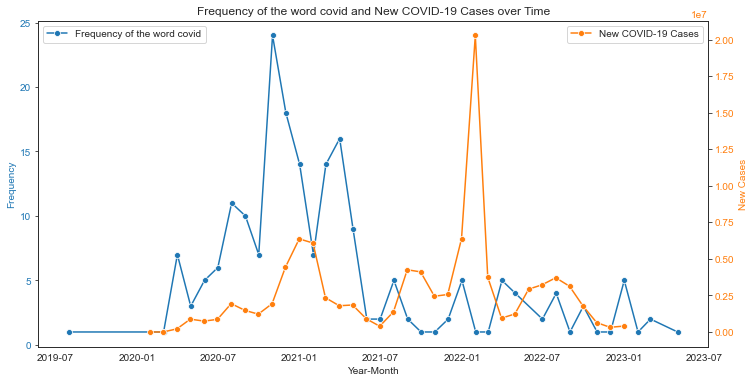

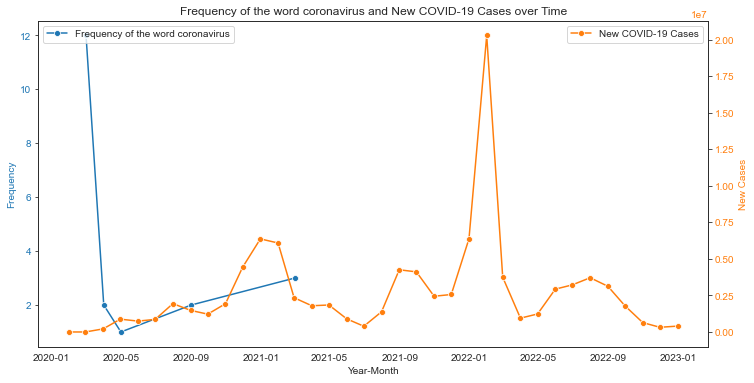

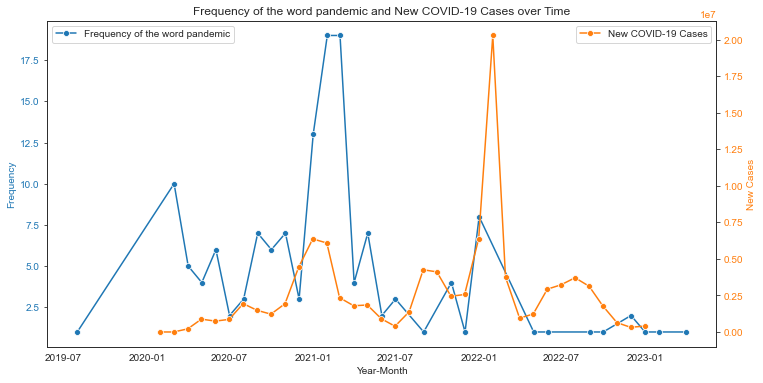

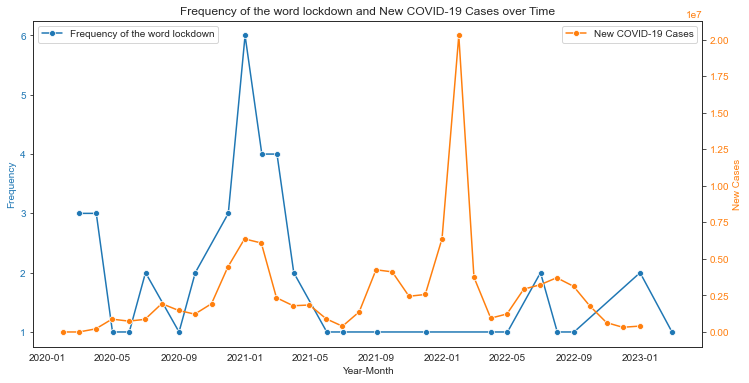

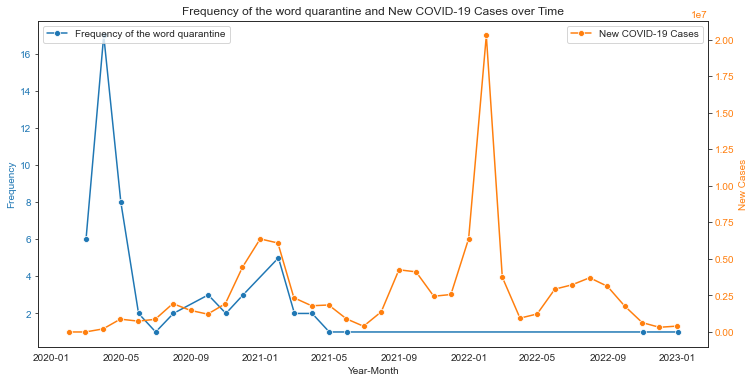

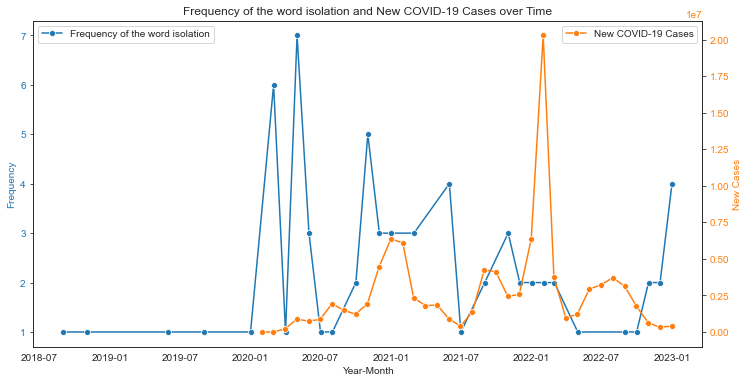

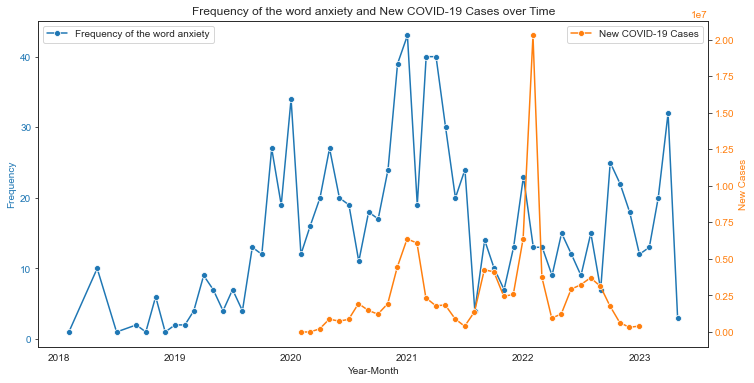

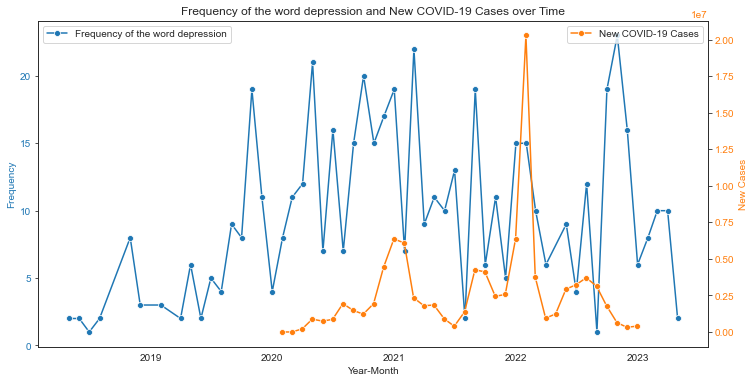

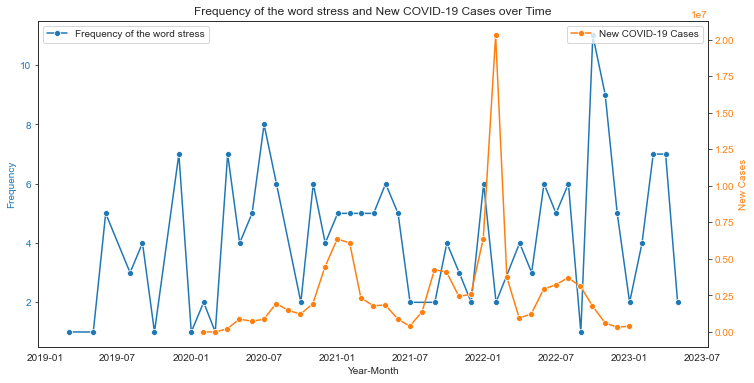

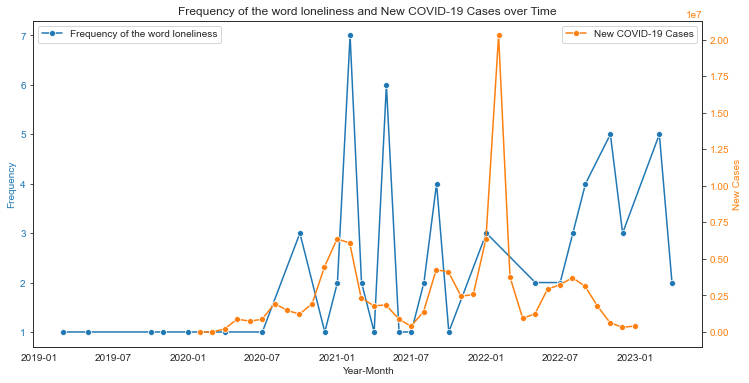

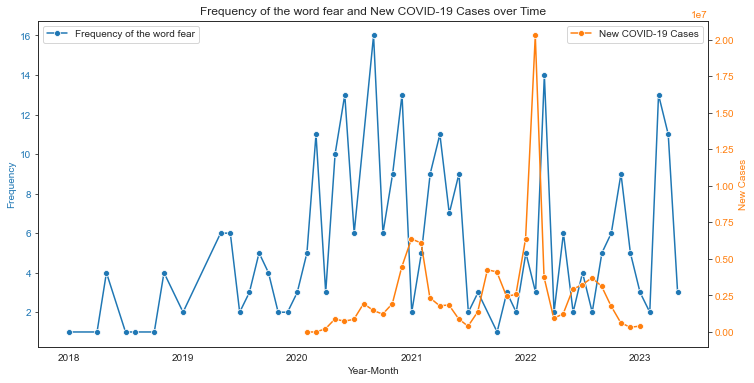

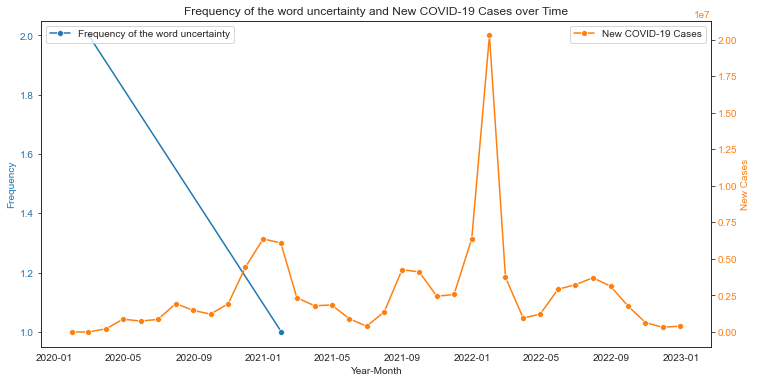

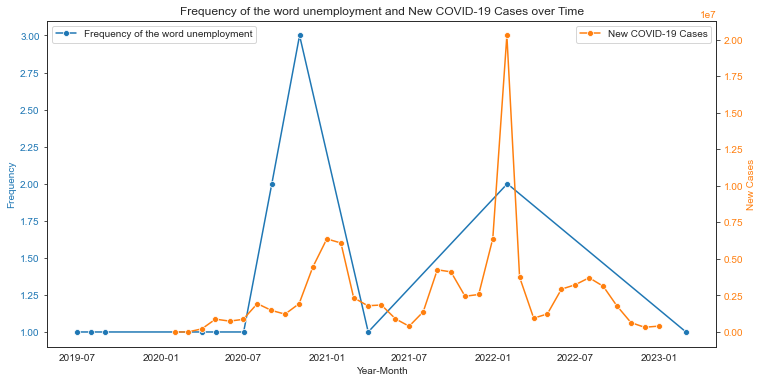

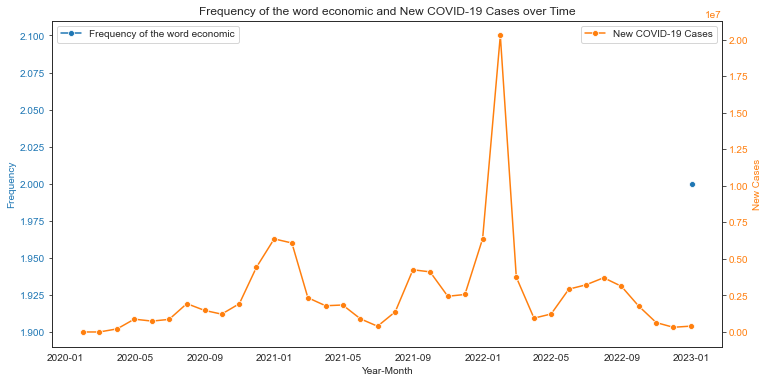

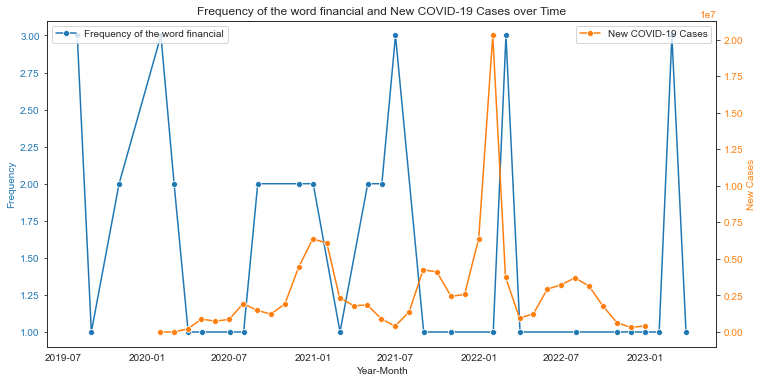

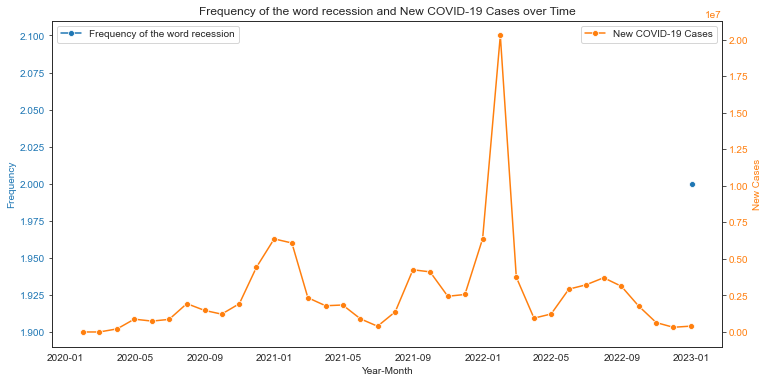

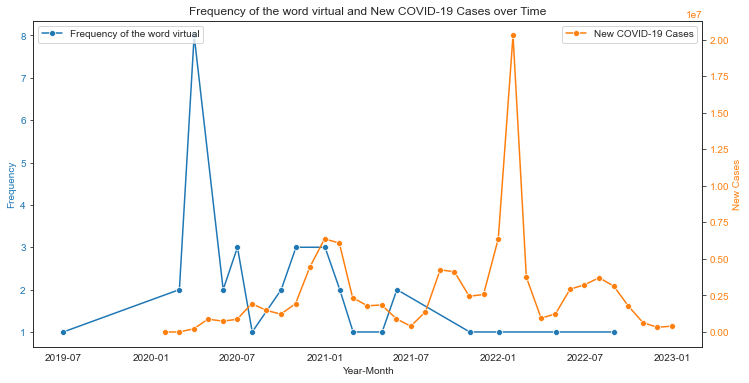

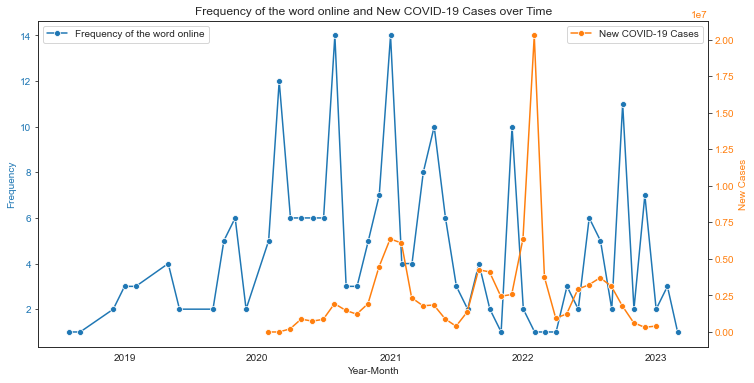

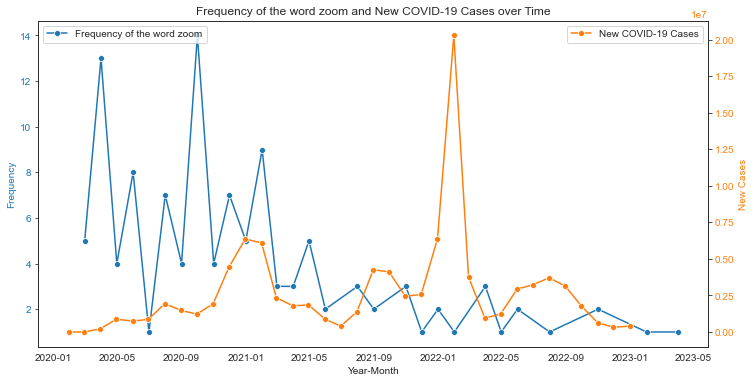

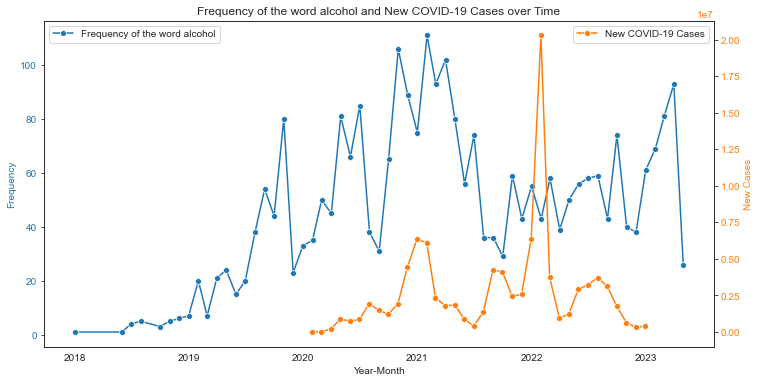

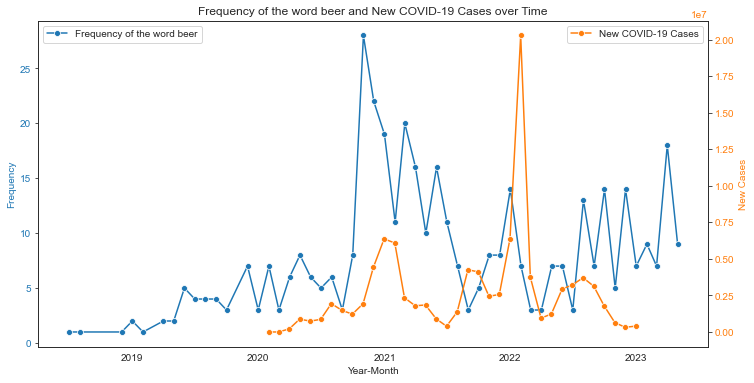

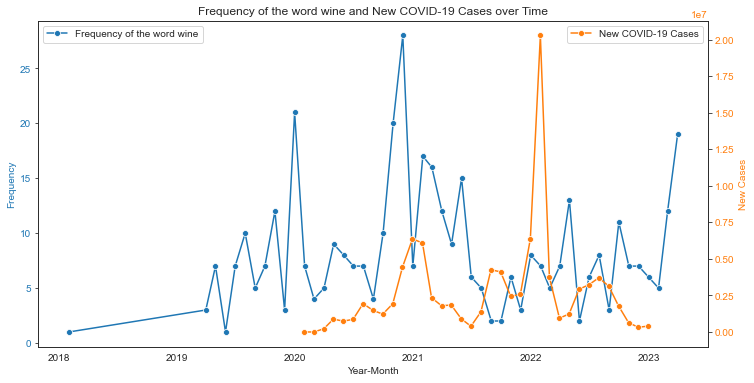

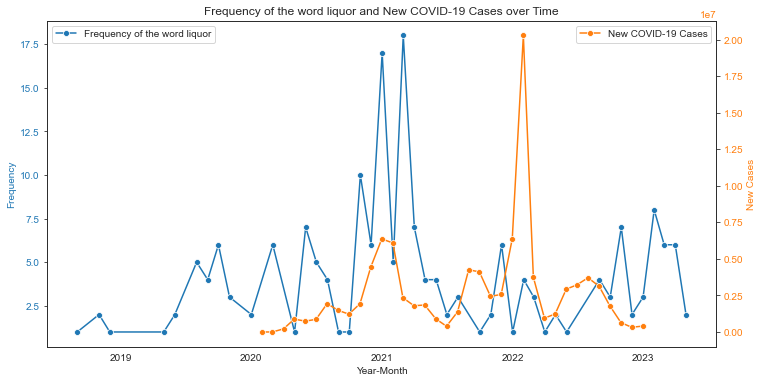

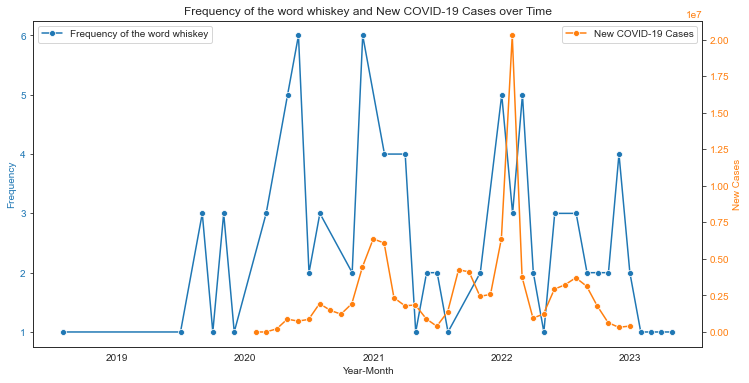

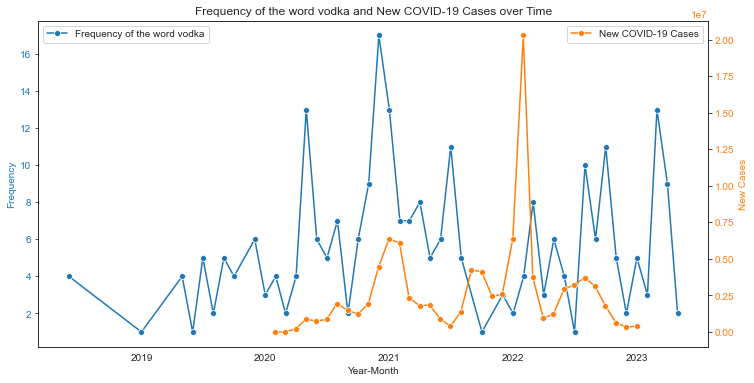

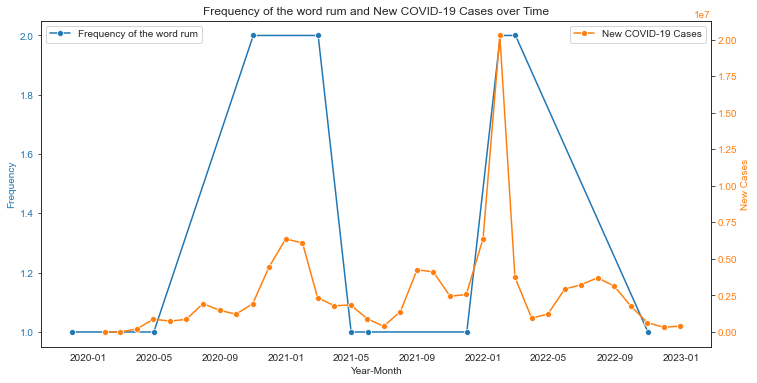

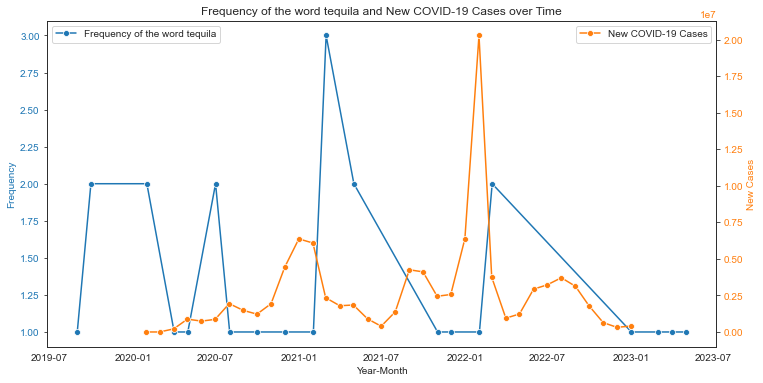

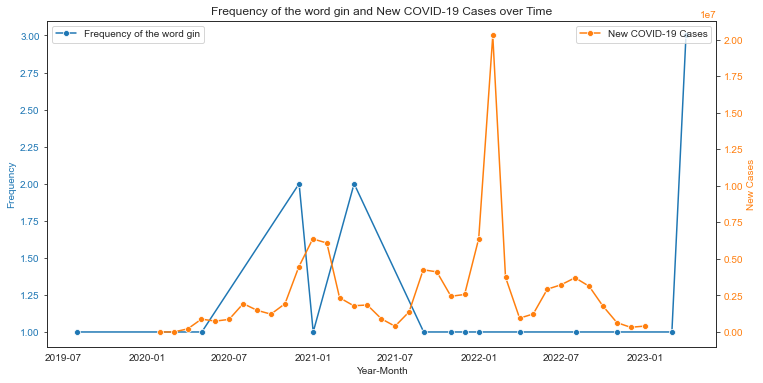

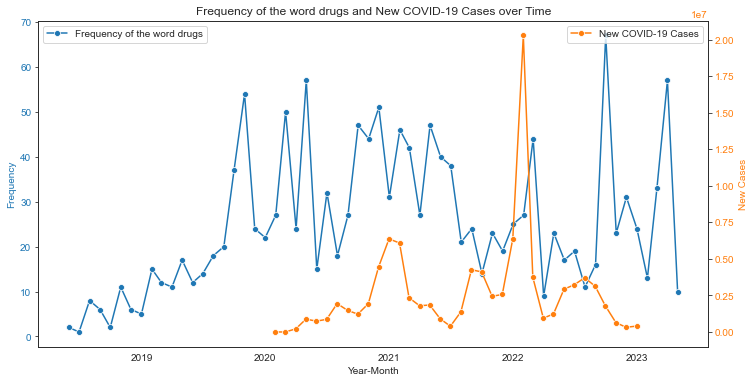

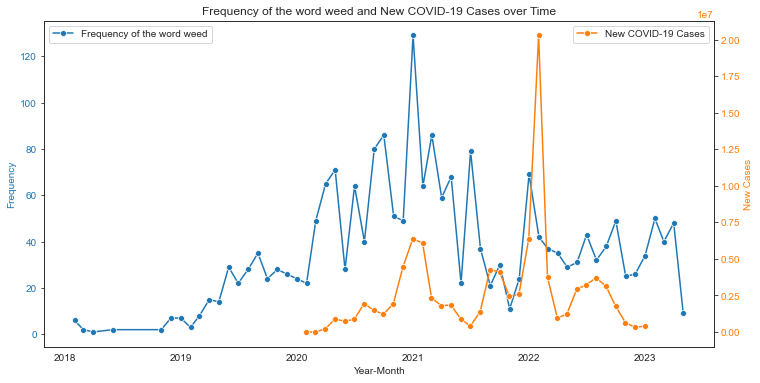

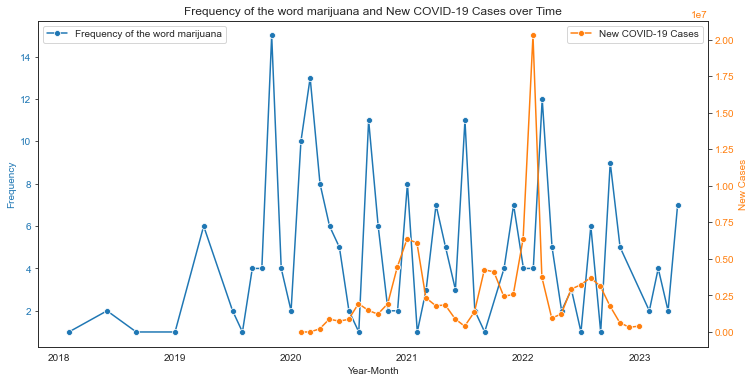

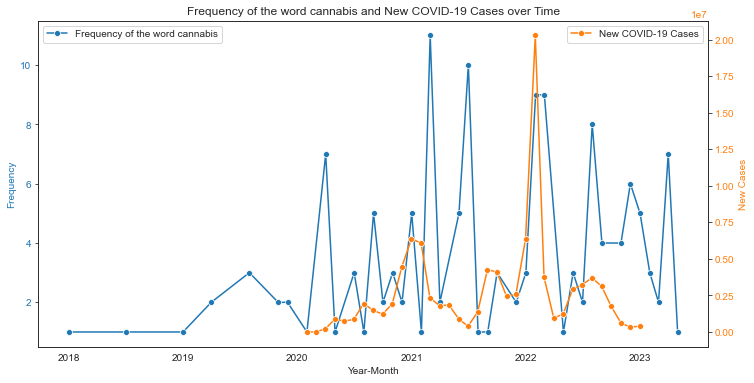

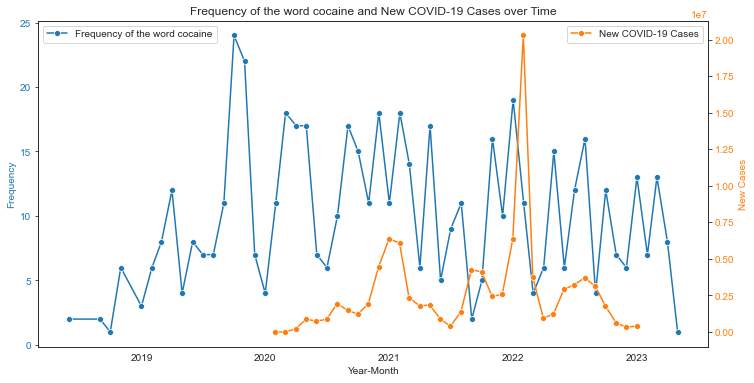

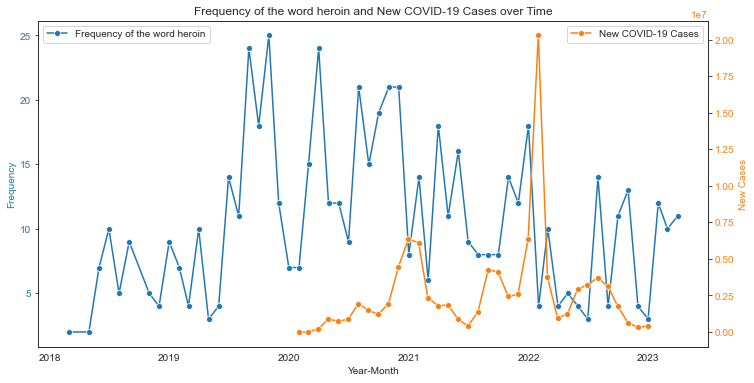

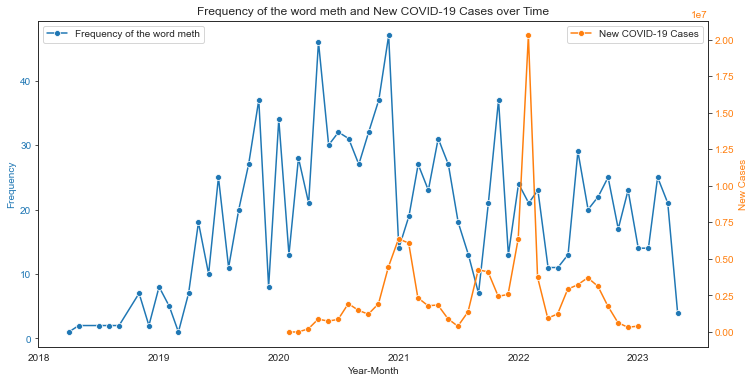

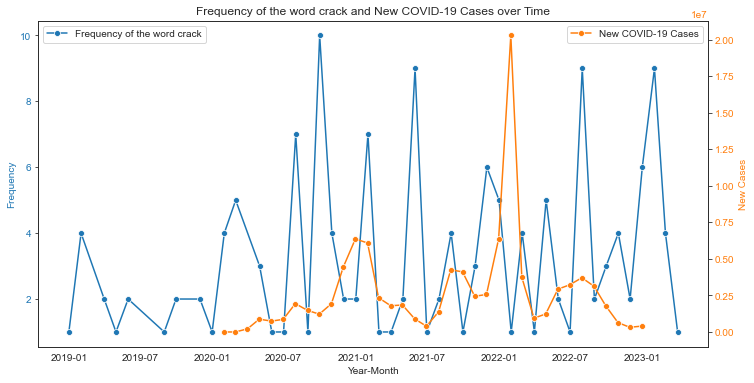

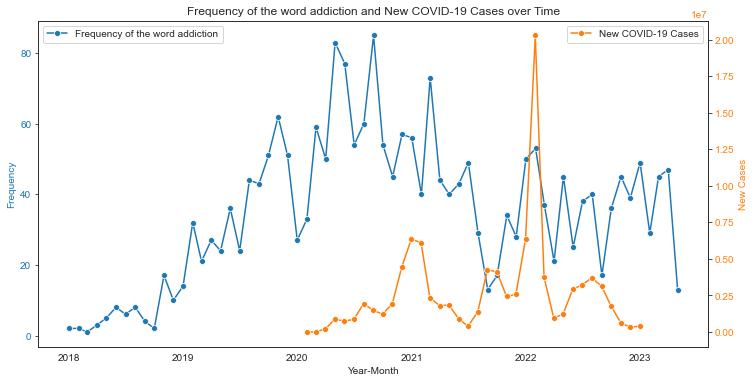

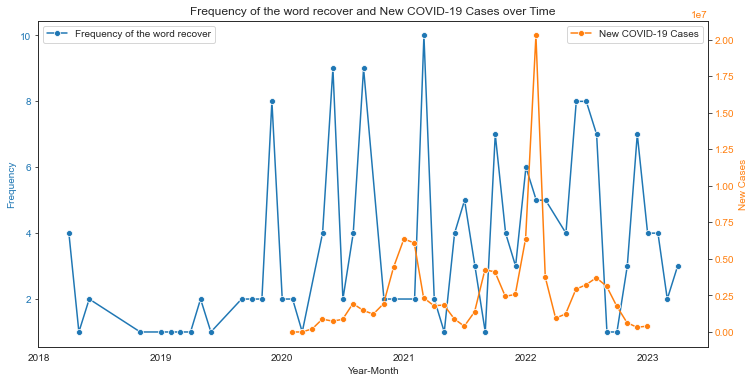

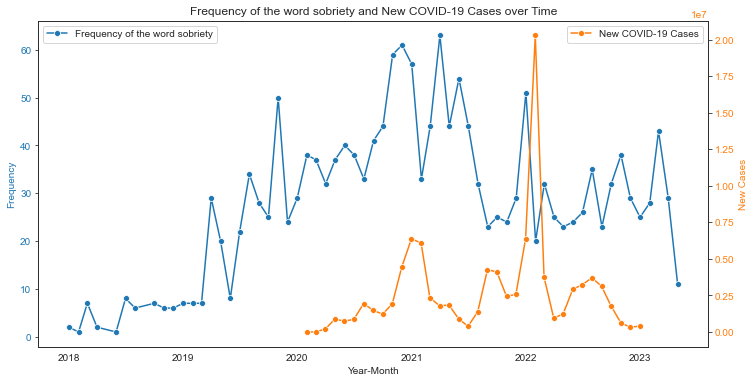

In [17]:
words_to_analyze = ['covid', 'coronavirus', 'pandemic', 'lockdown', 'quarantine', 'isolation', 'anxiety', 
                    'depression', 'stress', 'loneliness', 'fear', 'uncertainty', 'unemployment', 'economic', 
                    'financial', 'recession', 'virtual', 'online', 'zoom', 'alcohol', 
                    'beer', 'wine', 'liquor', 'whiskey', 'vodka', 'rum', 'tequila', 'gin', 'drugs', 'weed', 
                    'marijuana', 'cannabis', 'cocaine', 'heroin', 'meth', 'crack', 'addiction', 'recover', 'sobriety']

for word in words_to_analyze:
    # Load data for plot 1
    df = word_freq_by_month_year
    df_filtered = df[df['Text'] == word]
    df_grouped = df_filtered.groupby(['Year', 'Month'])['freq'].sum().reset_index()

    # Convert year and month columns to datetime index
    df_grouped['Date'] = pd.to_datetime(df_grouped['Year'].astype(str) + '-' + df_grouped['Month'].astype(str))
    df_grouped.set_index('Date', inplace=True)

    # Create the first plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    sns.set_style('white')
    sns.lineplot(data=df_grouped, x=df_grouped.index, y='freq', marker='o', ax=ax1, color='tab:blue', label='Frequency of the word {}'.format(word))
    ax1.set_xlabel('Year-Month')
    ax1.set_ylabel('Frequency', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title('Frequency of the word {} and New COVID-19 Cases over Time'.format(word))

    # Load data for plot 2
    df = monthly_cases

    # Create the second plot
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x=df.index, y='new_case', marker='o', ax=ax2, color='tab:orange', label='New COVID-19 Cases')
    ax2.set_ylabel('New Cases', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Create legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.show()
